In [1]:
import scvelo as scv

file = "mouseBM_with_velo.loom"
adata_loom = scv.read_loom(file)
adata_loom
file = "mouseBM.h5ad"
adata = scv.read(file)
adata_loom.obsm['X_wnn.umap'] = adata.obsm['X_wnn.umap']
s = scv.read("spliced.csv")
u = scv.read("unspliced.csv")
adata_loom.layers['spliced'] = s.X
adata_loom.layers['unspliced'] = u.X
adata_loom.obs['seurat_clusters'] = adata_loom.obs['seurat_clusters'].apply(lambda x:int(x)+1)


Trying to set attribute `.obs` of view, copying.


Filtered out 19239 genes that are detected in less than 100 cells (spliced).
Filtered out 1862 genes that are detected in less than 100 cells (unspliced).
Filtered out 101 genes that are detected 10 counts (shared).
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:27) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 20/64 cores)


  0%|          | 0/665 [00:00<?, ?gene/s]

    finished (0:02:46) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:13) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph
    finished (0:01:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:05) --> added
    'velocity_wnn.umap', embedded velocity vectors (adata.obsm)


KeyError: 2

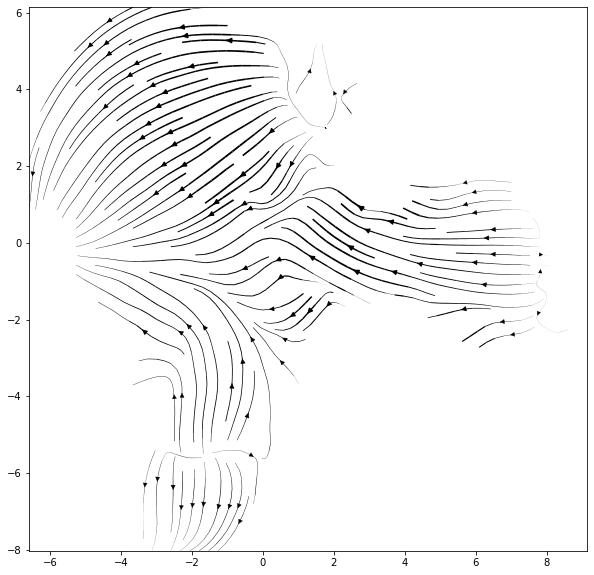

In [78]:
# try just filter out low-expressed genes

import pandas as pd
import scanpy as sc
adata_no_murk = adata_loom.copy()
murk_genes = list(pd.read_csv('MURK.mouse.list',header=None)[0])
list_no_murk =[gene for gene in adata_no_murk.var_names if gene not in murk_genes]
adata_no_murk = adata_no_murk[:,list_no_murk]

sc.pp.filter_cells(adata_no_murk, min_genes=200)
scv.pp.filter_and_normalize(adata_no_murk,min_shared_counts=10,min_cells=100,min_cells_u=100,subset_highly_variable=False)
scv.pp.moments(adata_no_murk,n_neighbors=80)
scv.tl.recover_dynamics(adata_no_murk, n_jobs = 20)
scv.tl.velocity(adata_no_murk,mode="dynamical")
scv.tl.velocity_graph(adata_no_murk,basis="X_wnn.umap")
colors = ['#F8766D','#E7851E','#D09400','#B2A100','#89AC00','#45B500','#00BC51','#00C087','#00C0B2','#00BCD6','#00B3F2','#29A3FF','#9C8DFF','#D277FF','#F166E8','#FF61C7','#FF689E']
cdict = {str(i):colors[i] for i in range(len(colors)) }
scv.pl.velocity_embedding_stream(adata_no_murk, basis="X_wnn.umap", color="seurat_clusters",figsize=(10,10),palette=cdict)


In [75]:
adata_no_murk=adata_loom.copy()

scv.pp.filter_and_normalize(adata_no_murk,min_shared_counts=10,min_cells=500,min_cells_u=500,subset_highly_variable=False)
scv.pp.moments(adata_no_murk,n_neighbors=80)
scv.tl.recover_dynamics(adata_no_murk, n_jobs = 20)
scv.tl.velocity(adata_no_murk,mode="dynamical")
scv.tl.velocity_graph(adata_no_murk)
colors = ['#F8766D','#E7851E','#D09400','#B2A100','#89AC00','#45B500','#00BC51','#00C087','#00C0B2','#00BCD6','#00B3F2','#29A3FF','#9C8DFF','#D277FF','#F166E8','#FF61C7','#FF689E']
cdict = {str(i):colors[i] for i in range(len(colors)) }
scv.pl.velocity_embedding_stream(adata_no_murk, basis="X_wnn.umap", color="seurat_clusters",figsize=(10,10),palette=cdict)


AnnData object with n_obs × n_vars = 13949 × 31053
    obs: 'ADT.weight', 'BM_pred', 'Blood_pred', 'Bone_pred', 'RNA.weight', 'id', 'nCount_ADT', 'nCount_RNA', 'nCount_ambiguous', 'nCount_spliced', 'nCount_unspliced', 'nFeature_ADT', 'nFeature_RNA', 'nFeature_ambiguous', 'nFeature_spliced', 'nFeature_unspliced', 'orig.ident', 'percent.mt', 'seurat_clusters', 'wsnn_res.1'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_wnn.umap'
    layers: 'counts', 'spliced', 'unspliced'

In [77]:
?scv.pp.filter_and_normalize

Signature:
scv.pp.filter_and_normalize(
    data,
    min_counts=None,
    min_counts_u=None,
    min_cells=None,
    min_cells_u=None,
    min_shared_counts=None,
    min_shared_cells=None,
    n_top_genes=None,
    retain_genes=None,
    subset_highly_variable=True,
    flavor='seurat',
    log=True,
    layers_normalize=None,
    copy=False,
    **kwargs,
)
Docstring:
Filtering, normalization and log transform

Expects non-logarithmized data. If using logarithmized data, pass `log=False`.

Runs the following steps

.. code:: python

    scv.pp.filter_genes(adata)
    scv.pp.normalize_per_cell(adata)
    if n_top_genes is not None:
        scv.pp.filter_genes_dispersion(adata)
    if log:
        scv.pp.log1p(adata)


Arguments
---------
data: :class:`~anndata.AnnData`
    Annotated data matrix.
min_counts: `int` (default: `None`)
    Minimum number of counts required for a gene to pass filtering (spliced).
min_counts_u: `int` (default: `None`)
    Minimum number of counts required f

In [36]:
adata_loom.obs

,ADT.weight,BM_pred,Blood_pred,Bone_pred,RNA.weight,id,nCount_ADT,nCount_RNA,nCount_ambiguous,nCount_spliced,nCount_unspliced,nFeature_ADT,nFeature_RNA,nFeature_ambiguous,nFeature_spliced,nFeature_unspliced,orig.ident,percent.mt,seurat_clusters,wsnn_res.1
CellID,,,,,,,,,,,,,,,,,,,,
mWT_AAACCCAAGTGATCGG-1,0.870270,7,10,9,0.129730,reference,103.0,3787.0,292.0,2652.0,1536.0,7,1690,235,1386,1059,mWT,5.307631,11,17
mWT_AAACCCACAAACCATC-1,0.959198,3,4,4,0.040802,reference,284.0,13420.0,1009.0,9371.0,7050.0,8,3991,719,3392,3016,mWT,3.204173,5,11
mWT_AAACCCACACTGTCCT-1,0.864076,1,1,1,0.135924,reference,208.0,20299.0,1047.0,15026.0,2846.0,7,4446,660,3958,1843,mWT,1.059165,2,1
mWT_AAACCCACAGCCATTA-1,0.881692,7,10,9,0.118308,reference,180.0,11463.0,780.0,8139.0,3787.0,8,3649,559,3129,2130,mWT,2.852656,11,17
mWT_AAACCCAGTACCTAAC-1,0.998782,5,6,6,0.001218,reference,414.0,22463.0,1477.0,16033.0,8120.0,8,5146,924,4463,3391,mWT,3.770645,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mNFIXko_TTTGTTGCAAGTGGGT-1,0.699054,4,5,5,0.300946,reference,126.0,20980.0,1074.0,15473.0,4002.0,8,4516,649,3979,2219,mNFIXko,2.936130,6,12
mNFIXko_TTTGTTGCACGCTATA-1,0.723788,3,4,4,0.276212,reference,248.0,4128.0,349.0,2912.0,1988.0,8,1800,287,1469,1241,mNFIXko,4.215116,5,11
mNFIXko_TTTGTTGCAGTAACCT-1,0.621971,4,7,7,0.378029,reference,58.0,9025.0,678.0,6384.0,3886.0,8,3086,475,2611,2012,mNFIXko,3.235457,8,14


In [ ]:

scv.pp.filter_and_normalize(adata_loom, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_loom, n_pcs=30, n_neighbors=30)
scv.tl.velocity(adata_loom)
scv.tl.velocity_graph(adata_loom)
scv.pl.velocity_embedding_stream(adata_loom, basis="X_wnn.umap", color="seurat_clusters",figsize=(10,10))


In [4]:
import scanpy as sc

sc.pp.normalize_total(adata_loom, target_sum=1e4)
sc.pp.log1p(adata_loom)
sc.pp.highly_variable_genes(adata_loom, min_mean=0.05,min_disp=0.1)
list_hvg = adata_loom.var_names[adata_loom.var.highly_variable]

In [5]:
list_hvg

Index(['Rb1cc1', '4732440D04Rik', 'Pcmtd1', 'Vcpip1', 'Sgk3', 'Prex2', 'Ncoa2',
       'Eya1', 'Rdh10', 'Stau2',
       ...
       'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3', 'mt-Nd4', 'mt-Nd5', 'mt-Nd6',
       'mt-Cytb', 'Vamp7', 'AC149090.1'],
      dtype='object', name='Gene', length=4434)

In [6]:
[x for x in list_hvg if "mt-" in x]

['mt-Nd1',
 'mt-Nd2',
 'mt-Co1',
 'mt-Co2',
 'mt-Atp8',
 'mt-Atp6',
 'mt-Co3',
 'mt-Nd4',
 'mt-Nd5',
 'mt-Nd6',
 'mt-Cytb']

In [8]:
adata = adata_loom.copy()
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes = 2000)

list_scv = adata.var_names

list_out = [gene for gene in list_scv if gene not in list_hvg]

list_tot = list(list_hvg)

list_tot.extend(list_out)

Filtered out 20764 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.


In [10]:
adata = adata_loom.copy()
adata = adata[:,list_tot]

In [11]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Trying to set attribute `.obs` of view, copying.


Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:06) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [61]:
import pandas as pd
mat_s = pd.DataFrame(adata.layers['Ms'].copy())
mat_u = pd.DataFrame(adata.layers['Mu'].copy())
mat_s.index = adata.obs_names
mat_s.columns = adata.var_names
mat_u.index = adata.obs_names
mat_u.columns = adata.var_names

In [62]:
mat_u

Gene,Rb1cc1,4732440D04Rik,Pcmtd1,Vcpip1,Sgk3,Prex2,Ncoa2,Eya1,Rdh10,Stau2,...,Dok6,Gm17552,Peli3,Tmem151a,Cst6,Tsga10ip,Fosl1,Tmem262,Gpha2,Nrxn2
CellID,,,,,,,,,,,,,,,,,,,,,
mWT_AAACCCAAGTGATCGG-1,0.0,0.000000,0.040187,0.0,0.0,0.0,0.0,0.410648,0.0,0.133419,...,0.085061,0.161923,0.000000,0.000000,0.160272,1.741652,0.151043,1.185322,0.031918,0.000000
mWT_AAACCCACAAACCATC-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.474790,0.0,0.094528,...,0.134376,0.096885,0.085295,0.000000,0.217881,2.426757,0.128186,1.305005,0.015664,0.009931
mWT_AAACCCACACTGTCCT-1,0.0,0.125899,0.000000,0.0,0.0,0.0,0.0,0.577243,0.0,0.146754,...,0.163185,0.258087,0.101402,0.018772,0.174315,2.378198,0.245833,0.808347,0.000000,0.099298
mWT_AAACCCACAGCCATTA-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.330327,0.0,0.062566,...,0.168835,0.102801,0.032017,0.000000,0.145562,2.330343,0.310421,1.271683,0.008109,0.059687
mWT_AAACCCAGTACCTAAC-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.261245,0.0,0.125525,...,0.085445,0.070775,0.019539,0.000000,0.234000,2.134601,0.138867,1.419549,0.051884,0.017477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mNFIXko_TTTGTTGCAAGTGGGT-1,0.0,0.017123,0.043468,0.0,0.0,0.0,0.0,0.300120,0.0,0.231608,...,0.066977,0.055951,0.092601,0.035855,0.158847,2.093359,0.113252,1.092863,0.017805,0.032267
mNFIXko_TTTGTTGCACGCTATA-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250886,0.0,0.103724,...,0.119795,0.077105,0.000000,0.000000,0.066526,2.318184,0.119212,0.912936,0.035161,0.000000
mNFIXko_TTTGTTGCAGTAACCT-1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.579527,0.0,0.019088,...,0.091965,0.174148,0.024199,0.000000,0.208197,2.006687,0.234847,1.110703,0.083711,0.042223


In [63]:
# initialize dataframes for slopes (df_sl) and slope error (df_ds)
df_sl = pd.DataFrame(index = adata.var_names)
df_ds = pd.DataFrame(index = adata.var_names)

In [17]:
adata.obs seurat_clusters

,ADT.weight,BM_pred,Blood_pred,Bone_pred,RNA.weight,id,nCount_ADT,nCount_RNA,nCount_ambiguous,nCount_spliced,...,nFeature_spliced,nFeature_unspliced,orig.ident,percent.mt,seurat_clusters,wsnn_res.1,initial_size_spliced,initial_size_unspliced,initial_size,n_counts
CellID,,,,,,,,,,,,,,,,,,,,,
mWT_AAACCCAAGTGATCGG-1,0.870270,7,10,9,0.129730,reference,103.0,3787.0,292.0,2652.0,...,1386,1059,mWT,5.307631,11,17,575.0,394.0,1334.755737,1334.755737
mWT_AAACCCACAAACCATC-1,0.959198,3,4,4,0.040802,reference,284.0,13420.0,1009.0,9371.0,...,3392,3016,mWT,3.204173,5,11,2064.0,1656.0,1883.079834,1883.079834
mWT_AAACCCACACTGTCCT-1,0.864076,1,1,1,0.135924,reference,208.0,20299.0,1047.0,15026.0,...,3958,1843,mWT,1.059165,2,1,3503.0,720.0,1252.556396,1252.556396
mWT_AAACCCACAGCCATTA-1,0.881692,7,10,9,0.118308,reference,180.0,11463.0,780.0,8139.0,...,3129,2130,mWT,2.852656,11,17,1805.0,928.0,1588.787964,1588.787964
mWT_AAACCCAGTACCTAAC-1,0.998782,5,6,6,0.001218,reference,414.0,22463.0,1477.0,16033.0,...,4463,3391,mWT,3.770645,7,13,3602.0,2078.0,2031.248047,2031.248047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mNFIXko_TTTGTTGCAAGTGGGT-1,0.699054,4,5,5,0.300946,reference,126.0,20980.0,1074.0,15473.0,...,3979,2219,mNFIXko,2.936130,6,12,3496.0,960.0,1455.772827,1455.772827
mNFIXko_TTTGTTGCACGCTATA-1,0.723788,3,4,4,0.276212,reference,248.0,4128.0,349.0,2912.0,...,1469,1241,mNFIXko,4.215116,5,11,632.0,477.0,1519.072388,1519.072388
mNFIXko_TTTGTTGCAGTAACCT-1,0.621971,4,7,7,0.378029,reference,58.0,9025.0,678.0,6384.0,...,2611,2012,mNFIXko,3.235457,8,14,1549.0,903.0,1492.568237,1492.568237


In [64]:
# compute slopes and errors
import numpy as np
for pop in adata.obs['seurat_clusters']:

    vec = adata.obs['seurat_clusters'] == pop
    
    x = mat_s.loc[vec]
    y = mat_u.loc[vec]
    
    mx = np.mean(x)
    my = np.mean(y)
    x_mx = x - mx
    y_my = y - my
    xy = np.sum(x_mx * y_my, axis = 0)
    X2 = np.sum(x_mx**2,axis = 0)
    sl = xy / X2
    inter = my - sl * mx
    n = np.sum(vec)
                
    df_sl[pop] = pd.DataFrame(sl)     
    
    pred = sl * x + inter
    sse = (pred - y)**2
    SSE = np.sum(sse, axis = 0)
                
    ds = np.sqrt(SSE/(n-2)/X2)
    df_ds[pop] = pd.DataFrame(ds)

In [65]:
# initialize dataframes for slopes (df_exp), expression error (df_de) and 95% quantile (df_quant)
df_exp = pd.DataFrame(index = adata.var_names)
df_de = pd.DataFrame(index = adata.var_names)
df_quan = pd.DataFrame(index = adata.var_names)

In [66]:
import scipy 
# compute average expression and its error
for pop in adata.obs['seurat_clusters']:

    vec = adata.obs['seurat_clusters'] == pop
    n = np.sum(vec)
    expr = np.mean(mat_s.loc[vec], axis = 0)
    dex = np.std(mat_s.loc[vec], axis = 0)/np.sqrt(n)
    
    df_exp[pop] = pd.DataFrame(expr)
    df_de[pop] = pd.DataFrame(dex)

for pop in adata.obs['seurat_clusters']:

    vec = adata.obs['seurat_clusters'] == pop
    n = np.sum(vec)
    
    df_quan[pop] = scipy.stats.t.ppf(0.95, n - 1)

In [67]:

# compute minimum and maximum estimates of the slopes
df_conf = df_ds * df_quan

df_min = df_sl - df_conf
df_max = df_sl + df_conf

In [86]:
df_sl.sort_values(11,ascending=False).head(n=10)

,11,5,2,7,8,15,4,3,14,13,6,12,10,18,9,16,17
Gene,,,,,,,,,,,,,,,,,
Rnf13,16.223852,15.054192,0.786995,22.956861,19.829699,0.277340,14.142922,22.249546,12.987988,20.439583,18.979717,12.807436,20.813229,NaN,20.653580,21.320187,20.495590
Tnfsf13os,7.495919,14.456133,NaN,10.131371,7.767631,NaN,4.974112,15.439857,17.886894,6.313155,14.965211,4.200039,4.851446,NaN,17.572760,7.781039,0.641427
Hist1h1a,5.793094,2.233476,2.493636,5.319664,3.109111,1.098290,3.408908,2.557331,-0.057966,0.339904,0.901529,2.294279,2.998303,3.908730,0.774957,2.001877,5.364267
Kdm5b,5.440749,1.514616,7.141915,6.237979,3.109008,5.516857,4.929235,9.496449,9.110863,2.601166,9.437457,23.278152,0.828294,25.657051,2.621846,13.234204,2.742783
Ncl,5.373040,7.047238,19.984346,13.754379,15.704139,14.472165,4.034793,12.622503,12.915033,12.965539,19.269293,24.968744,14.020119,14.179536,11.363658,14.180624,10.887002
Rimklb,4.197294,3.396163,3.859145,4.453217,5.367861,3.316958,3.843336,3.509736,2.176593,2.484120,6.292270,4.833873,3.157904,12.014361,5.147242,8.200608,13.136412
Adam9,3.742949,NaN,-3.239545,3.288083,0.260453,NaN,-0.029461,0.468888,NaN,NaN,6.710186,-7.872304,NaN,NaN,NaN,2.502393,NaN
Gm44581,3.727515,2.374239,31.560152,7.091119,31.423397,8.376589,2.691552,5.737000,13.260004,4.360048,14.778573,58.935783,6.876428,10.995942,1.374565,15.199754,-2.745738
Trim34b,3.557265,0.199325,3.651523,2.660576,2.032480,0.819845,1.804007,1.729159,0.191933,0.432986,0.478785,0.580194,2.260383,6.981347,0.030422,0.870945,5.522332


In [84]:
df_sl.sort_values(11,ascending=False).head(n=10)

Gene
Elmod2       -4.006432
Ep300        -2.548800
Ing3         -2.525976
Hbp1         -2.132164
Tceal1       -1.969751
                ...   
mt-Nd5             NaN
mt-Nd6             NaN
mt-Cytb            NaN
Vamp7              NaN
AC149090.1         NaN
Length: 5609, dtype: float32

In [85]:
df_sl.std(axis=1).sort_values()

Gene
Rb1cc1        0.0
Ccdc173       0.0
Ankrd12       0.0
Trim2         0.0
Gm26510       0.0
             ... 
mt-Nd5        NaN
mt-Nd6        NaN
mt-Cytb       NaN
Vamp7         NaN
AC149090.1    NaN
Length: 5609, dtype: float32

In [73]:
df_exp.loc['Mamstr']

11    0.108715
5     0.148192
2     1.307014
7     0.139133
8     0.902594
15    0.064492
4     0.094567
3     0.059234
14    0.038671
13    0.090245
6     0.021780
12    1.218667
10    0.181929
18    0.080957
9     0.170167
16    0.301743
17    0.143045
Name: Mamstr, dtype: float32

In [26]:
df_min

,11,5,2,7,8,15,4,3,14,13,6,12,10,18,9,16,17
Gene,,,,,,,,,,,,,,,,,
Rb1cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4732440D04Rik,NaN,NaN,NaN,-0.193648,NaN,NaN,NaN,-0.169432,NaN,NaN,0.398017,NaN,NaN,NaN,NaN,NaN,0.000000
Pcmtd1,-0.071706,NaN,-0.073056,NaN,NaN,NaN,NaN,-0.110090,-0.132887,-0.032747,-1.376131,NaN,-0.051318,NaN,NaN,NaN,NaN
Vcpip1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sgk3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tsga10ip,-0.064863,0.071417,-0.334343,0.284209,-0.060370,-0.238172,-0.195172,-0.015574,-1.385547,-0.723059,0.263513,-2.290348,0.029119,-2.724255,-0.259632,-1.153774,-1.083543
Fosl1,0.085756,-0.143114,-0.167572,-0.213168,-0.102852,-0.332766,-0.115614,-0.032698,-0.028402,-0.383250,-0.136911,-0.237371,-0.231252,-0.539905,-0.128704,-0.355869,-0.508995
Tmem262,-0.067685,0.030996,-0.037468,-0.022334,0.053760,0.071463,-0.050726,0.125210,-0.023934,-0.114876,-0.004696,0.090717,-0.036852,-0.318904,0.020754,0.101995,-0.256113


In [28]:
adata.obs['seurat_clusters'].min()

2